 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
csvpath = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(csvpath,index_col="Date",infer_datetime_format=True,parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna() 
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
csvpath = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(csvpath,index_col="Date",infer_datetime_format=True,parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
csvpath = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(csvpath,index_col="Date",infer_datetime_format=True,parse_dates=True)
sp500_df = sp500_df.sort_index()
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$","")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.head()

sp500_df.dtypes


C:\Users\shahp\AppData\Local\Temp\ipykernel_21980\185858988.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$","")


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_df = sp500_df.dropna()
sp500_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns = {"Close": "sp500"})
sp500_df.head()

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolio = pd.concat([whale_df, algo_df, sp500_df], axis = "columns", join = "inner")
combined_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

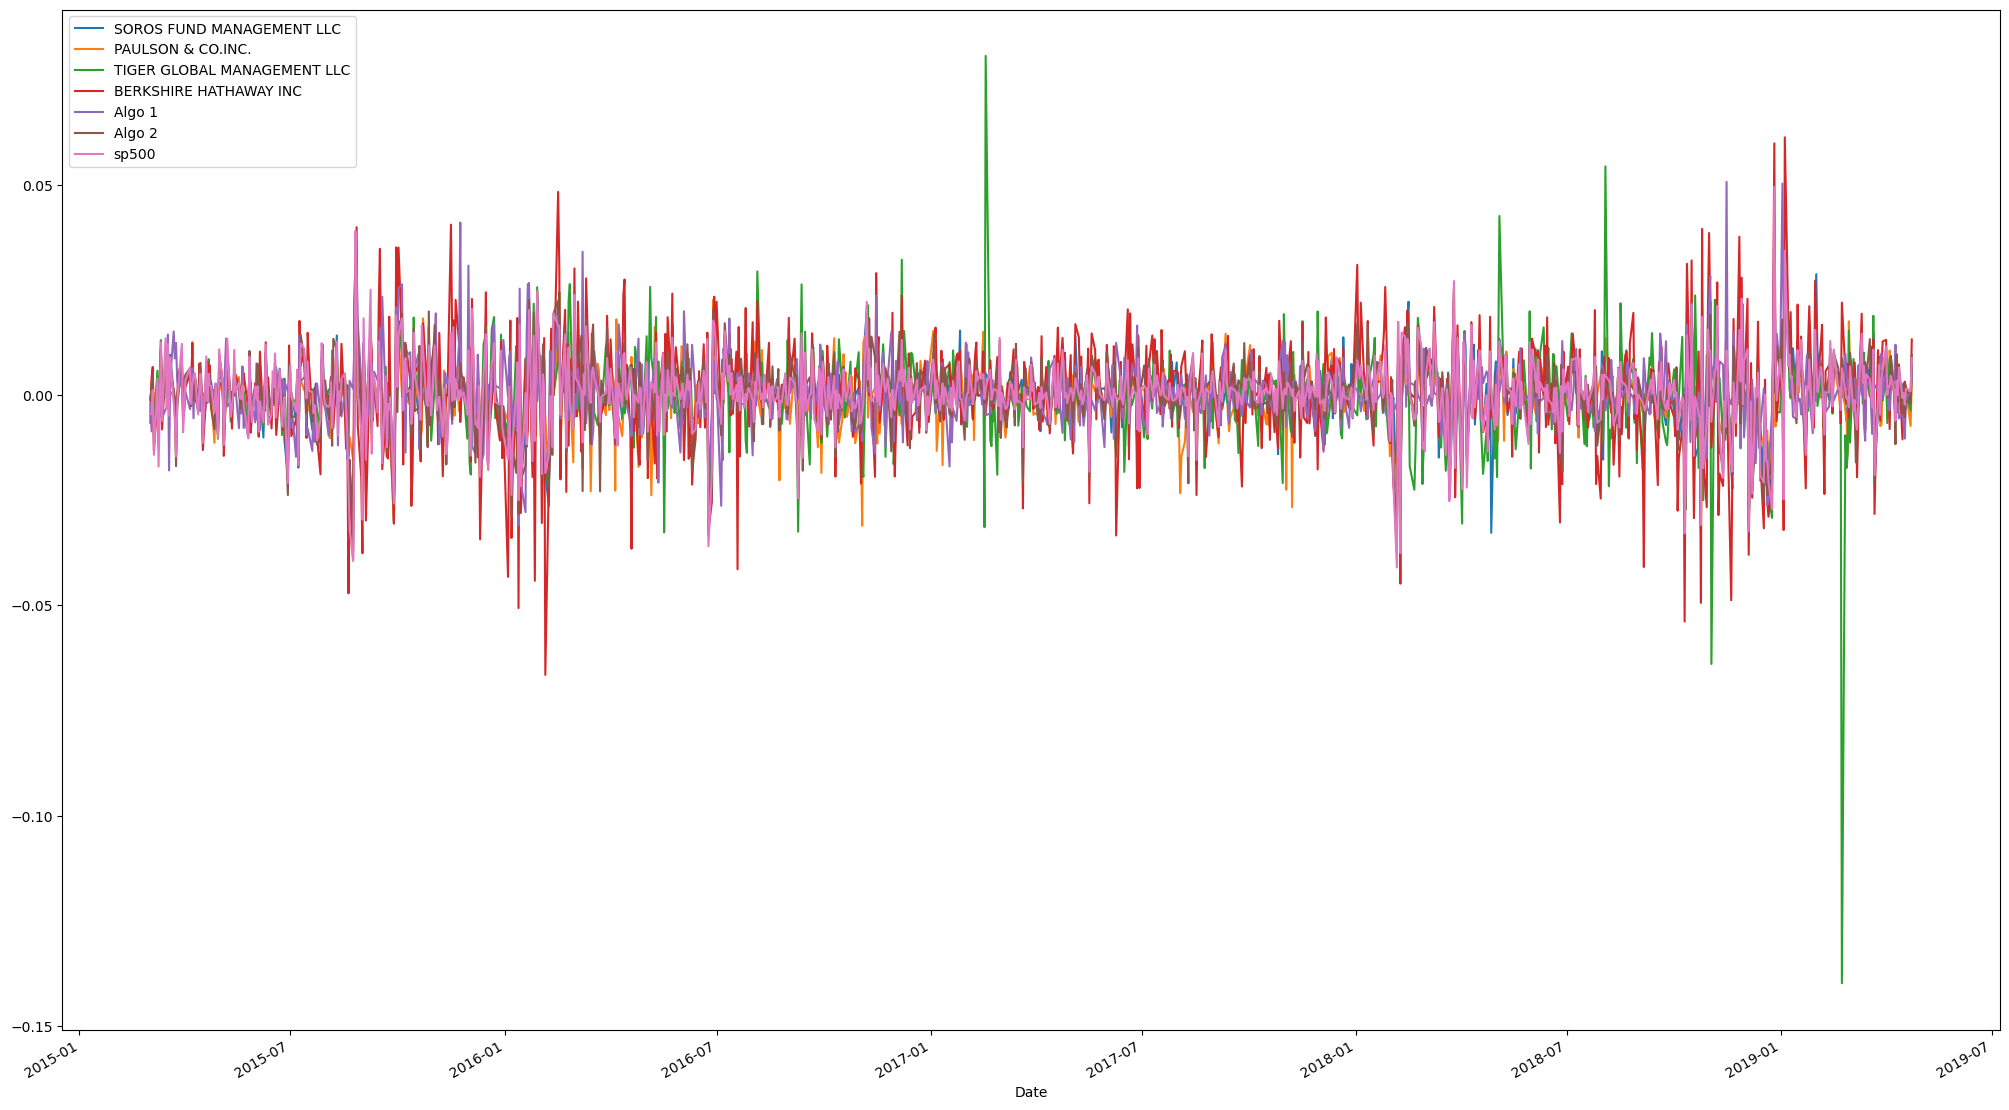

In [15]:
# Plot daily returns of all portfolios
combined_portfolio.plot(figsize=(25,15))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

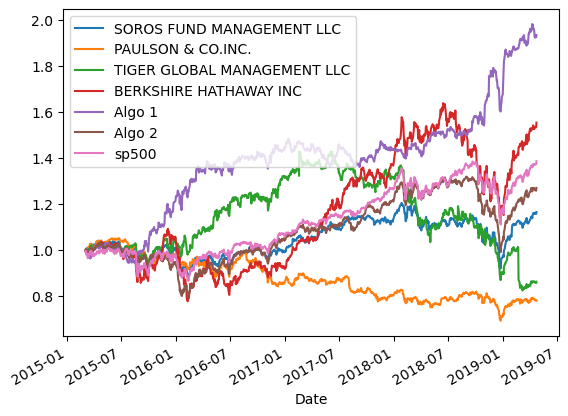

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+ combined_portfolio).cumprod()
cumulative_returns

# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

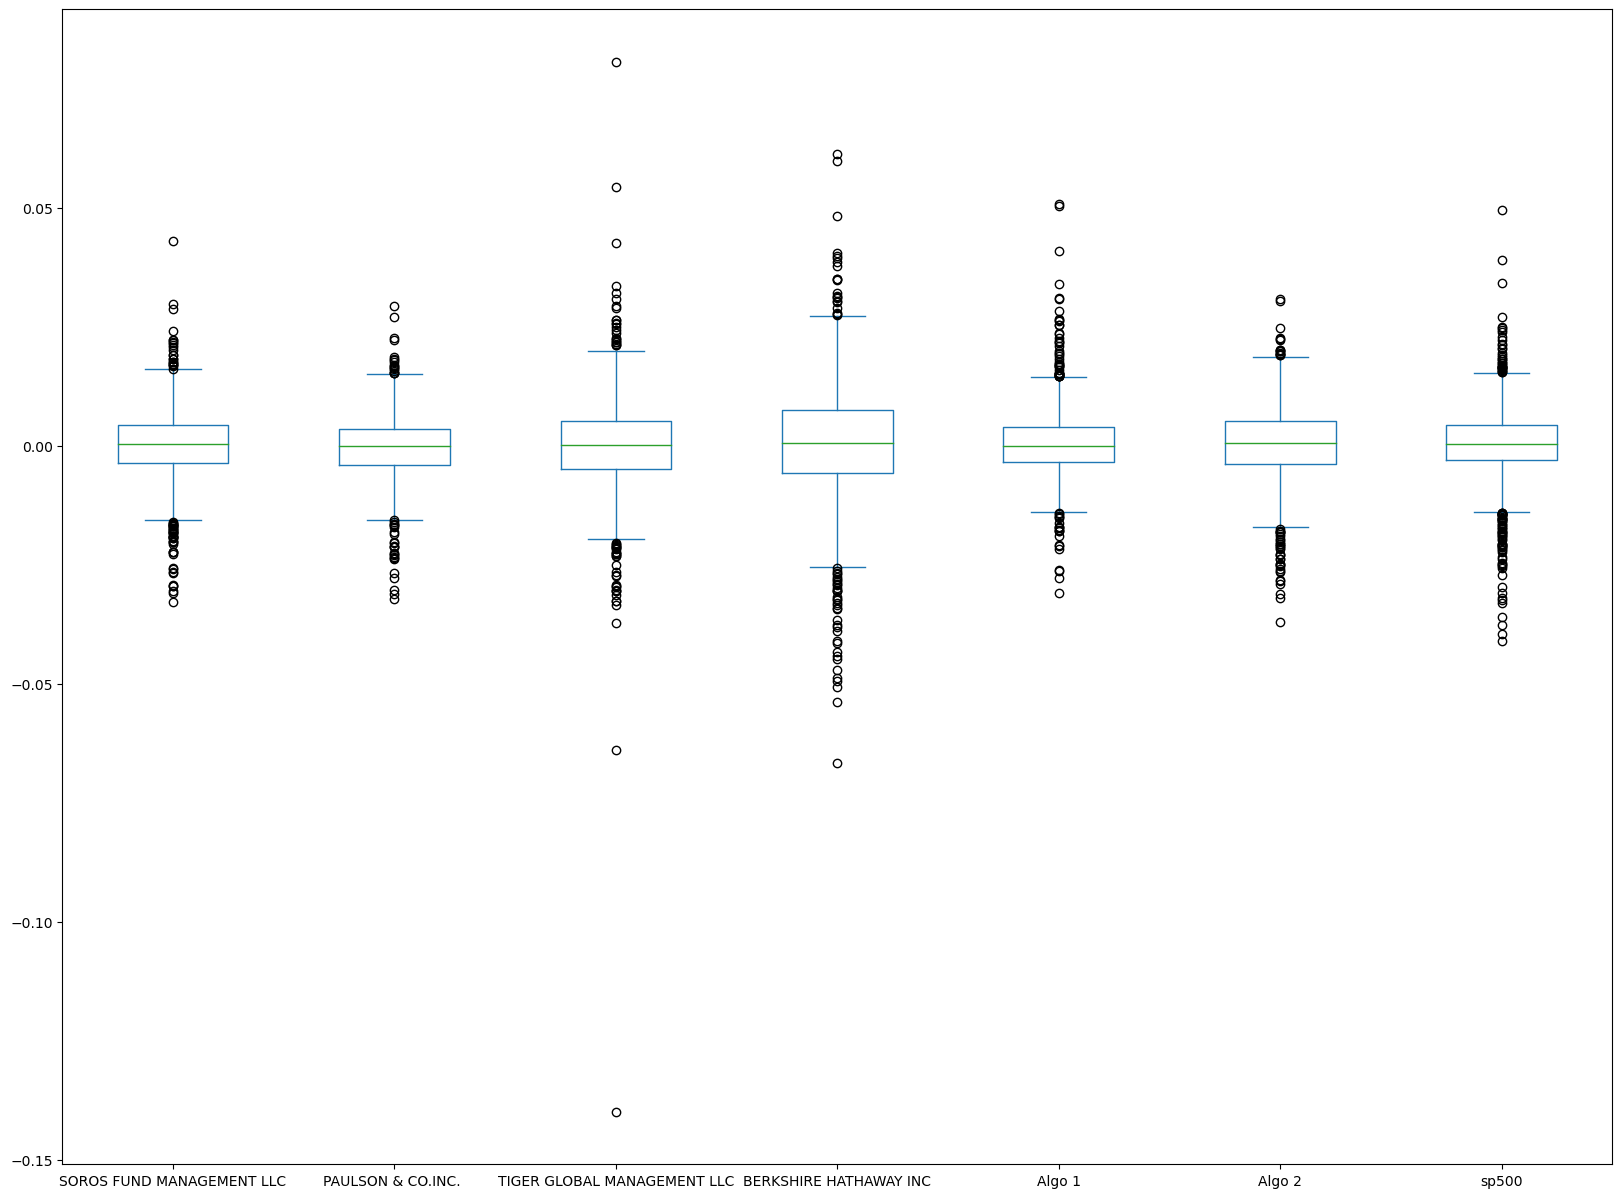

In [17]:
# Box plot to visually show risk
combined_portfolio.plot.box(figsize=(20,15))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_portfolio.std()
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
sp500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
daily_std_sp500 = sp500_df.std()
daily_std_sp500

# Determine which portfolios are riskier than the S&P 500
portfolios_riskier_than_sp500 = [daily_std > daily_std["sp500"]]
portfolios_riskier_than_sp500

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 sp500                          False
 Algo 2                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 1                         False
 PAULSON & CO.INC.              False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
sp500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

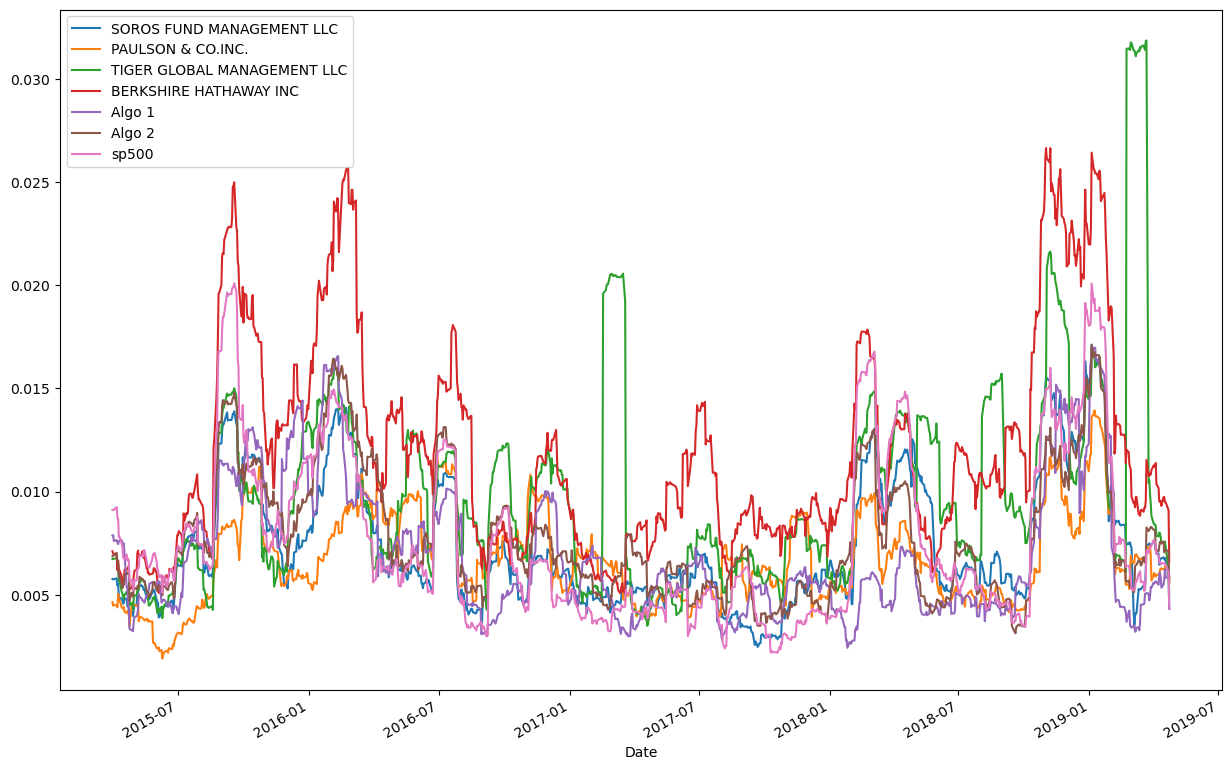

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

portfolio_rolling_21 = combined_portfolio.rolling(window=21).std()

# Plot the rolling standard deviation
portfolio_rolling_21.plot(figsize = (15,10))

### Calculate and plot the correlation

<Axes: >

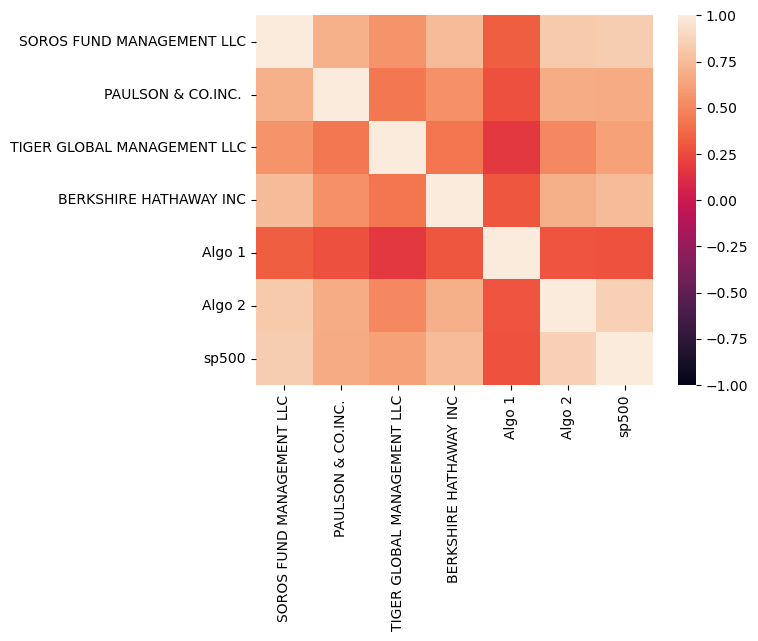

In [22]:
# Calculate the correlation
correlation = combined_portfolio.corr()
correlation

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1) 

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Beta'}, xlabel='Date'>

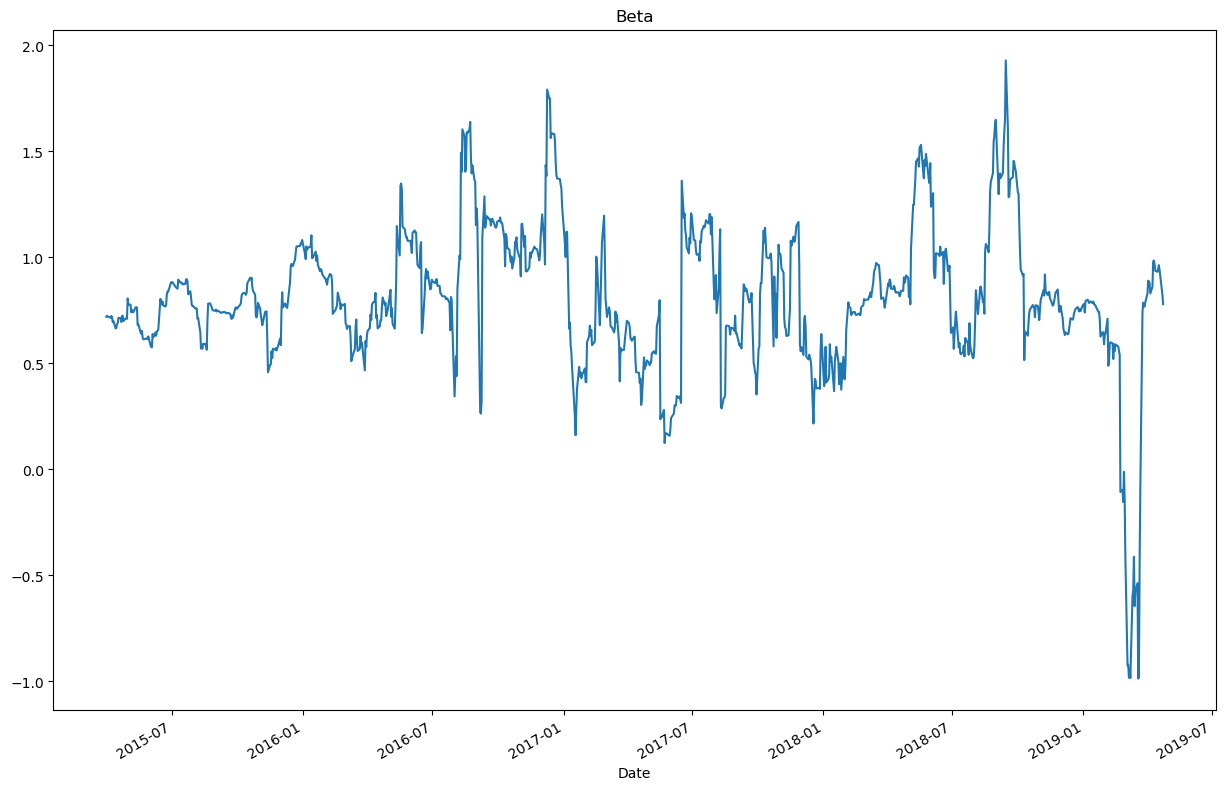

In [23]:
# Calculate covariance of a single portfolio
covariance = combined_portfolio["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=21).cov(combined_portfolio["sp500"])


# Calculate variance of S&P 500
variance = combined_portfolio["sp500"].rolling(21).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize = (15,10),title= "Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

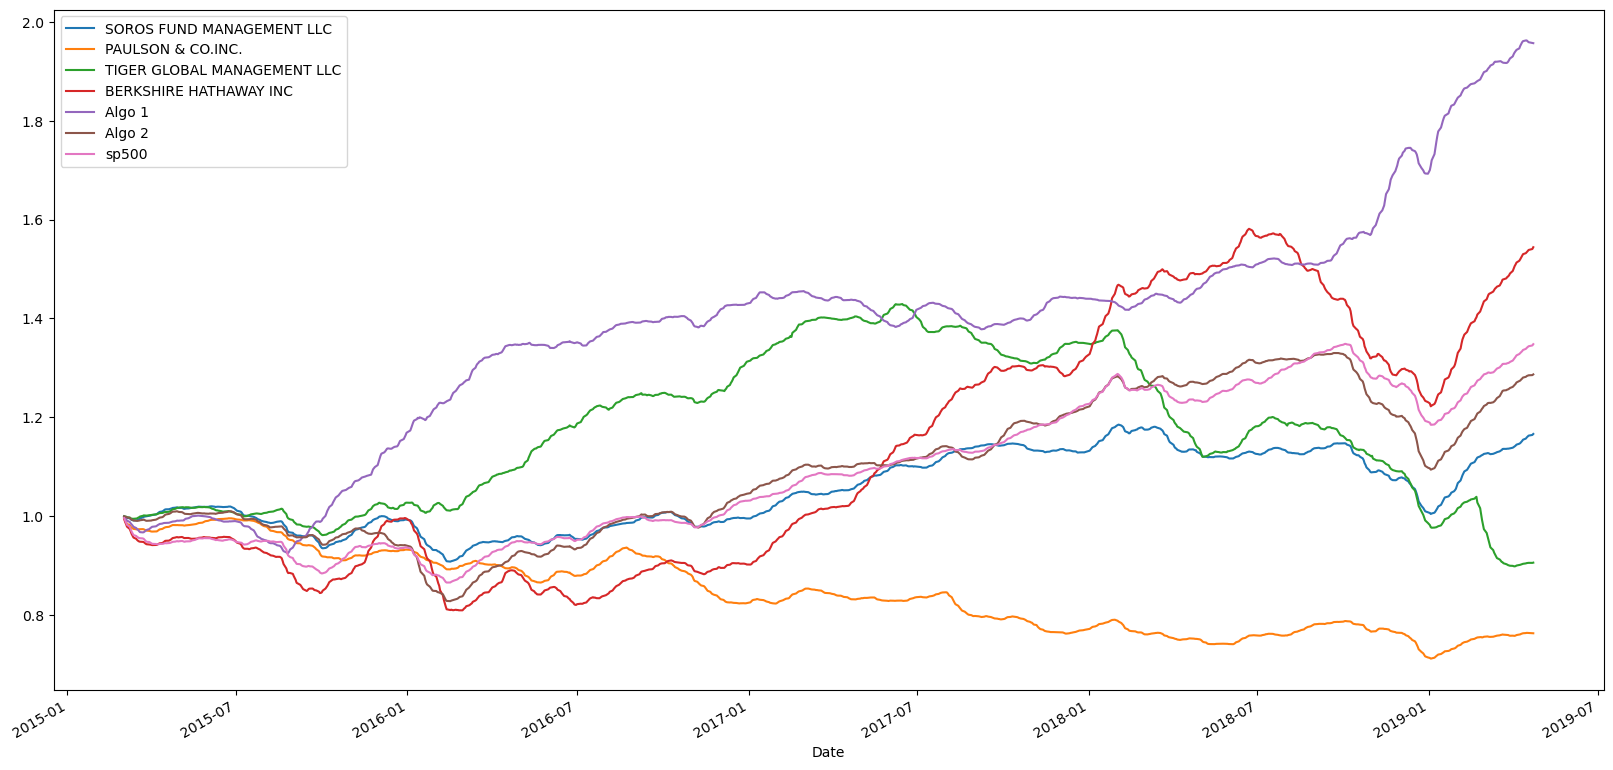

In [24]:
# Use `ewm` to calculate the rolling window
combined_portfolio_ewm = combined_portfolio.ewm(span = 21, adjust= False).mean()
(1+combined_portfolio_ewm).cumprod().plot(figsize = (20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_portfolio.mean()*252/(combined_portfolio.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

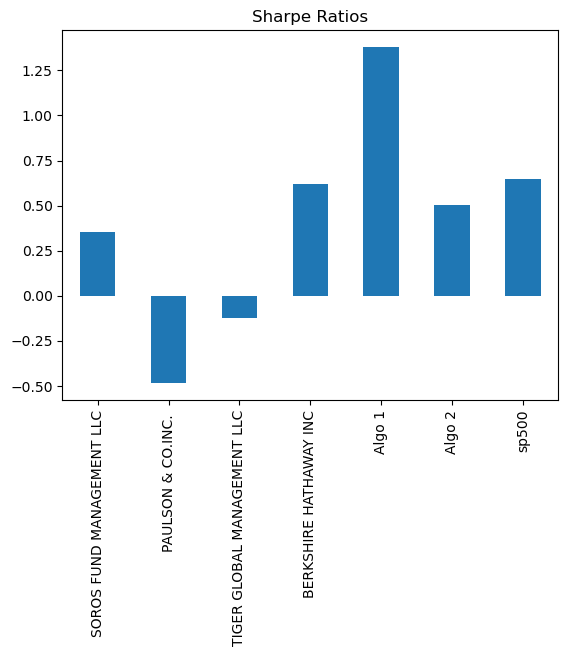

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [27]:
# Algo 1 did considerably better than both the market and the whales portfolios, while Algo 2 outperformed the whales, but did had slightly lower returns than the sp500. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock

csvpath = Path("Resources/Amazon_data.csv")
amazon_df = pd.read_csv(csvpath,index_col="Date",infer_datetime_format=True,parse_dates=True)
amazon_df["Symbol"] = "AMZN"
amazon_df = amazon_df.sort_index()
amazon_df.head()

,Close,Symbol
Date,,
2018-01-02 16:00:00,1189.01,AMZN
2018-01-03 16:00:00,1204.20,AMZN
2018-01-04 16:00:00,1209.59,AMZN
2018-01-05 16:00:00,1229.14,AMZN
2018-01-08 16:00:00,1246.87,AMZN


In [29]:
# Reading data from 2nd stock
csvpath = Path("Resources/Apple_data.csv")
apple_df = pd.read_csv(csvpath,index_col="Date",infer_datetime_format=True,parse_dates=True)
apple_df["Symbol"] = "AAPL"
apple_df = apple_df.sort_index()
apple_df.head()

,Close,Symbol
Date,,
2018-01-02 16:00:00,172.26,AAPL
2018-01-03 16:00:00,172.23,AAPL
2018-01-04 16:00:00,173.03,AAPL
2018-01-05 16:00:00,175.00,AAPL
2018-01-08 16:00:00,174.35,AAPL


In [30]:
# Reading data from 3rd stock
csvpath = Path("Resources/Google_data.csv")
google_df = pd.read_csv(csvpath,index_col="Date",infer_datetime_format=True,parse_dates=True)
google_df["Symbol"] = "GOOG"
google_df = google_df.sort_index()
google_df.head()

,Close,Symbol
Date,,
2018-01-02 16:00:00,1065.00,GOOG
2018-01-03 16:00:00,1082.48,GOOG
2018-01-04 16:00:00,1086.40,GOOG
2018-01-05 16:00:00,1102.23,GOOG
2018-01-08 16:00:00,1106.94,GOOG


In [31]:
# Combine all stocks in a single DataFrame

added_stocks_combined_df = pd.concat([amazon_df, apple_df, google_df], axis = "rows", join= "inner")
added_stocks_combined_df.head()


,Close,Symbol
Date,,
2018-01-02 16:00:00,1189.01,AMZN
2018-01-03 16:00:00,1204.20,AMZN
2018-01-04 16:00:00,1209.59,AMZN
2018-01-05 16:00:00,1229.14,AMZN
2018-01-08 16:00:00,1246.87,AMZN


In [32]:
# Reset Date index
added_stocks_combined_df = added_stocks_combined_df.reset_index()
added_stocks_combined_df["Date"] = added_stocks_combined_df["Date"].dt.date
added_stocks_combined_df.head()

,Date,Close,Symbol
0,2018-01-02,1189.01,AMZN
1,2018-01-03,1204.20,AMZN
2,2018-01-04,1209.59,AMZN
3,2018-01-05,1229.14,AMZN
4,2018-01-08,1246.87,AMZN


In [33]:
# Reorganize portfolio data by having a column per symbol
portfolio = added_stocks_combined_df.pivot_table(values="Close", index="Date", columns="Symbol")
portfolio.head()

Symbol,AAPL,AMZN,GOOG
Date,,,
2018-01-02,172.26,1189.01,1065.00
2018-01-03,172.23,1204.20,1082.48
2018-01-04,173.03,1209.59,1086.40
2018-01-05,175.00,1229.14,1102.23
2018-01-08,174.35,1246.87,1106.94


In [34]:
# Calculate daily returns

portfolio = portfolio.pct_change()
portfolio.head()

# Drop NAs
portfolio.dropna(inplace=True)

# Display sample data
portfolio.head()


Symbol,AAPL,AMZN,GOOG
Date,,,
2018-01-03,-0.000174,0.012775,0.016413
2018-01-04,0.004645,0.004476,0.003621
2018-01-05,0.011385,0.016163,0.014571
2018-01-08,-0.003714,0.014425,0.004273
2018-01-09,-0.000115,0.004676,-0.000614


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = portfolio.dot(weights)

# Display sample data
portfolio_returns.tail()

Date
2018-12-21   -0.041855
2018-12-24   -0.017859
2018-12-26    0.076551
2018-12-27   -0.002844
2018-12-28    0.001735
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio["Custom"] = portfolio_returns
combined_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio.dropna(inplace=True)
combined_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,Custom
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399,0.009671
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029,0.004247
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034,0.014040
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662,0.004995
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303,0.001316


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
daily_std2 = combined_portfolio.std()

annualized_std2 = daily_std2 * np.sqrt(252)
annualized_std2

SOROS FUND MANAGEMENT LLC      0.157898
PAULSON & CO.INC.              0.118081
TIGER GLOBAL MANAGEMENT LLC    0.198926
BERKSHIRE HATHAWAY INC         0.241140
Algo 1                         0.120142
Algo 2                         0.143071
sp500                          0.170760
Custom                         0.277826
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

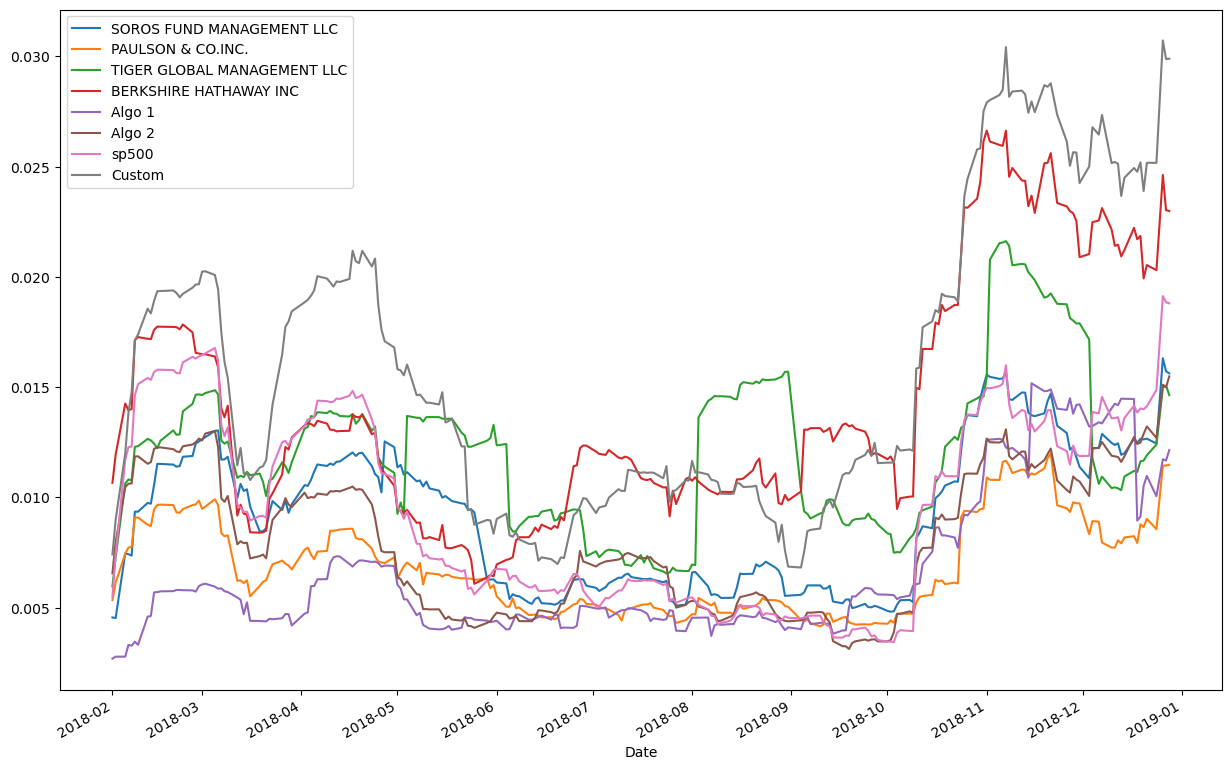

In [39]:
# Calculate rolling standard deviation
rolling_standard_21 = combined_portfolio.rolling(window=21).std()
rolling_standard_21

# Plot rolling standard deviation
rolling_standard_21.plot(figsize = (15,10))

### Calculate and plot the correlation

In [40]:
# Calculate and plot the correlation
all_correlation = combined_portfolio.corr()
all_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.784669,0.617011,0.802791,0.380088,0.846571,0.858033,0.756079
PAULSON & CO.INC.,0.784669,1.000000,0.665423,0.678606,0.358747,0.816956,0.816175,0.663355
TIGER GLOBAL MANAGEMENT LLC,0.617011,0.665423,1.000000,0.501976,0.187695,0.620307,0.704568,0.539604
BERKSHIRE HATHAWAY INC,0.802791,0.678606,0.501976,1.000000,0.373599,0.800010,0.837920,0.859909
Algo 1,0.380088,0.358747,0.187695,0.373599,1.000000,0.361460,0.322749,0.360463
Algo 2,0.846571,0.816956,0.620307,0.800010,0.361460,1.000000,0.895735,0.782655
sp500,0.858033,0.816175,0.704568,0.837920,0.322749,0.895735,1.000000,0.870599
Custom,0.756079,0.663355,0.539604,0.859909,0.360463,0.782655,0.870599,1.000000


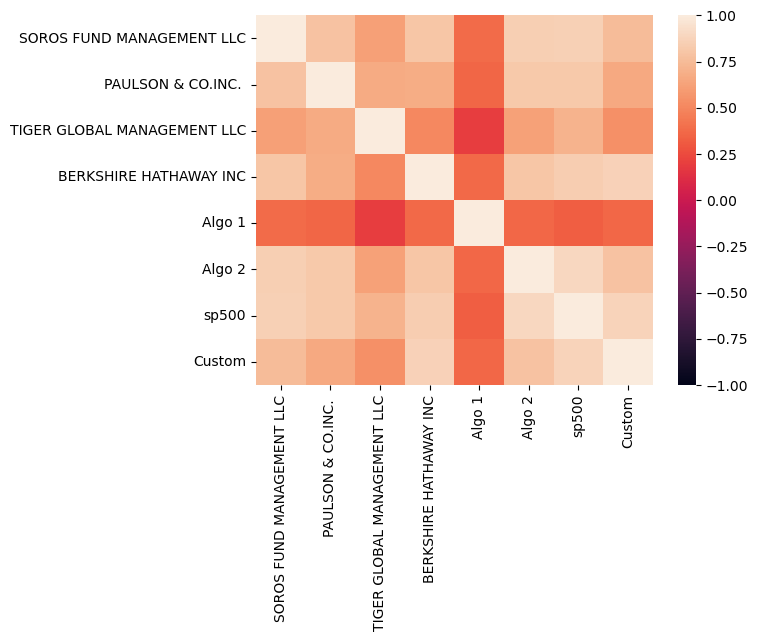

In [41]:
sns.heatmap(all_correlation, vmin=-1, vmax=1).get_figure().savefig('correlation.png')


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': '60-Day Beta'}, xlabel='Date'>

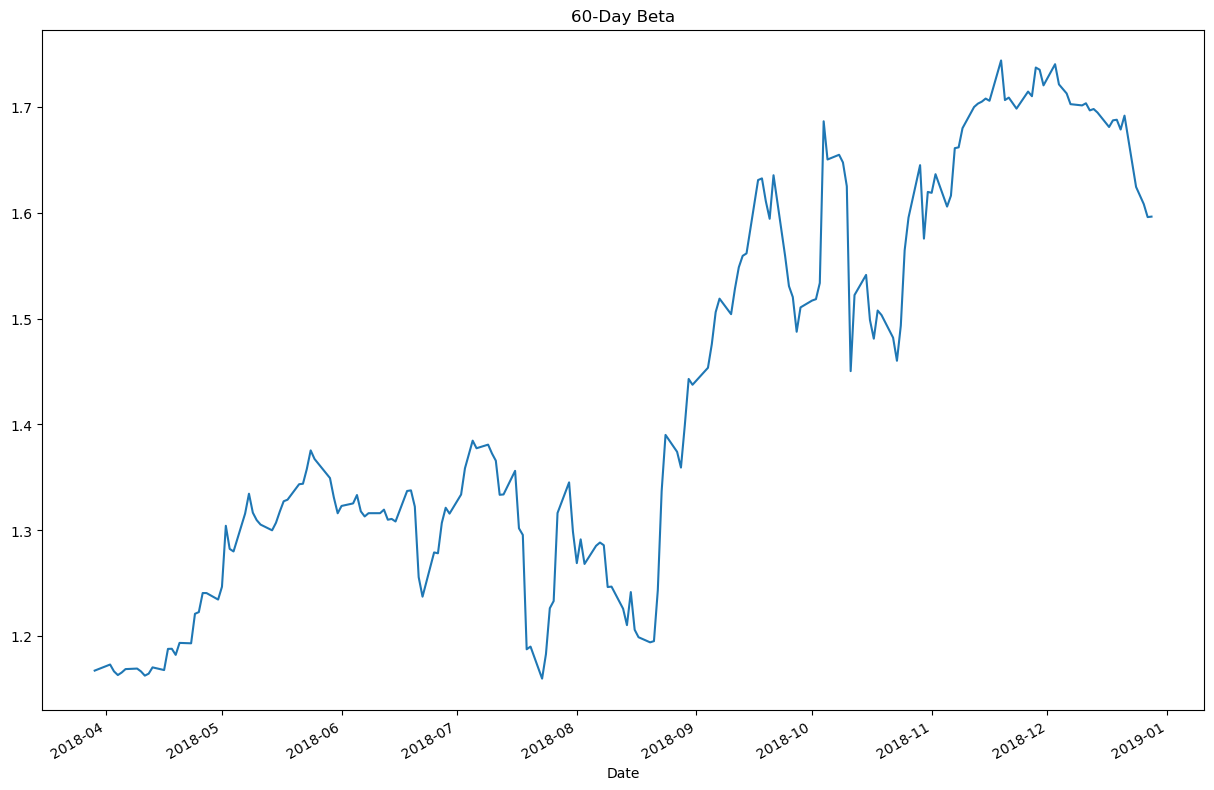

In [42]:
# Calculate and plot Beta
covariance = combined_portfolio["Custom"].rolling(window=60).cov(combined_portfolio["sp500"])
variance = combined_portfolio["sp500"].rolling(60).var()
beta2 = covariance / variance

beta2.plot(figsize = (15,10),title="60-Day Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualized Sharpe Ratios
trading_days = combined_portfolio.count()
sharpe_ratios = combined_portfolio.mean()*trading_days/(combined_portfolio.std()*np.sqrt(trading_days))

<Axes: title={'center': 'Sharpe Ratios'}>

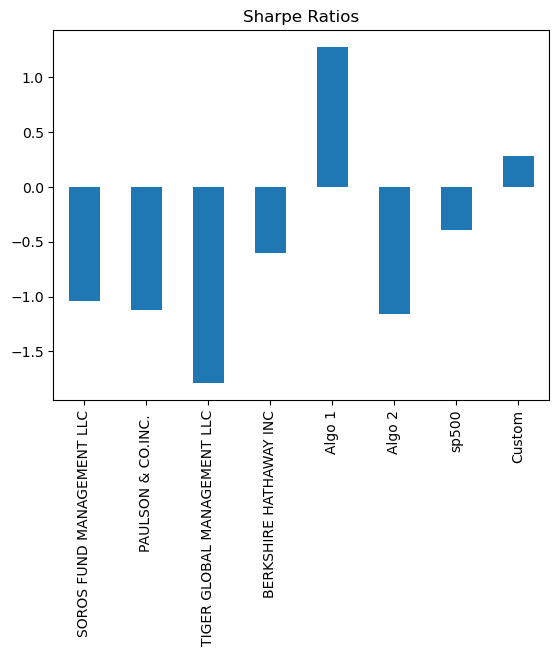

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "Sharpe Ratios")


### How does your portfolio do?

Write your answer here!

In [45]:
#My portfolio, labeled Custom, did well, especially compared to the other portfolios, but was outperformed only by Algo1.